In [1]:
#do this later from admin: !python -m pip install --upgrade pip


# TOC

0. [Imports](#first-bullet)
1. [EDA](#1.0-bullet)
2. [Feature Engineering](#2.0-bullet)  
 2.1 [Pt 1 - Regression](#2.1-bullet)  
 2.2 [Pt 2 - Classification](#2.2-bullet)
3. [Basic Model](#3.0-bullet)  
 3.1 [Pt 1 - Regression](#3.1-bullet)  
 3.2 [Pt 2 - Classification](#3.2-bullet)
4. [Reference and Planning](#4.0-bullet)

Date Time
* General: publishedAt
* Friday (is_friday)
* Is weekend (is_weekend)
* week number (week)
* Month day (month_day)
* Month (month)
* 2 digit year number (year)

* Ignoring overall day count - possible overfit to search algorithm

Description
* Sentiment (description_sentiment)
* Overall word count (description_wordcount)
* CVEC (./data/engineered_data/description_wordvec.csv)


Tags
* Sentiment (tags_sentiment)
* Num tags (tags_wordcount)
* CVEC (./data/engineered_data/tag_wordvec.csv)

Title
* Sentiment (title_sentiment)
* Word count (title_wordcount)
* feat / ft. (title_featuring)
* Letter Count (intitle_ + a,b,c,...)
* String length (title_length)
* Which letters
* Length  
* CVEC (./data/engineered_data/title_wordvec.csv)

Ratios
* likes / views (lv_ratio)
* comments / view (comment_view_ratio)
* likes / dislikes (like_dislike_ratio)

Measures (includes log)
  * commentCount
  * dislikeCount 
  * favoriteCount 
  * likeCount: 
  * viewCount: view_log

Other
* Has content rating restriction (contentRating)
* Has any region Restriction (regionRestriction)
* Has captioned text (caption)
* Content has approved license (licensedContent)
* Duration of video (duration)
* High definition 1 or std (0) (definition)


In [1]:
#Basic
import pandas as pd
import numpy as np
#Math
import scipy as sp
from random import randint
from math import exp
import operator

#Scraping
import requests
import json

#Youtube Data API Packages: 
"""from apiclient.discovery import build
from apiclient.errors import HttpError
from oauth2client.tools import argparser
from googleapiclient.discovery import build
import argparse
from googleapiclient.errors import HttpError"""

#Modeling
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.cluster import KMeans
from sklearn.svm import SVR
#from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

#NLP & Text Management
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
"""from textblob import TextBlob
from wordcloud import WordCloud
from nltk.stem import PorterStemmer"""

#Time analysis
import time
import datetime
"""from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf"""

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud

%matplotlib inline
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [2]:
df_main = pd.read_csv('./data/engineered_data/data_engineered_10.9_2019.csv')

In [3]:
model_time = ['is_weekend', 'is_friday', 'year_day', 'week', 'week_day', 'month', 'month_day', 'year',  ]
model_text = ['description_sentiment', 'description_wordcount',
  'tags_sentiment', 'tags_wordcount', 'title_sentiment',
 'title_wordcount', 'title_featuring', 'title_length', ]
model_title_letter = ['intitle_a',  'intitle_b', 'intitle_c', 'intitle_d', 'intitle_e', 'intitle_f', 'intitle_g',
 'intitle_h', 'intitle_i', 'intitle_j', 'intitle_k', 'intitle_l', 'intitle_m', 'intitle_n', 'intitle_o',
 'intitle_p', 'intitle_q', 'intitle_r', 'intitle_s', 'intitle_t', 'intitle_u', 'intitle_v', 'intitle_w',
 'intitle_x', 'intitle_y', 'intitle_z',]              
model_ratios = ['lv_ratio', 'comment_view_ratio', 'like_dislike_ratio',]
model_other = ['duration', 'contentRating', 'regionRestriction',  'licensedContent', 'caption', 'definition']
measures = ['likeCount', 'dislikeCount', 'commentCount', 'viewCount',
            'view_log',  'comment_log',  'like_log', 'dislike_log', 
            'view_class' ]
non_model_cols = ['request_token', 'letter_search','channelTitle', 'tags', 'title', 'vidId','publishedAt','favoriteCount',
              'description','defaultLanguage', ]

# <a class="anchor" id="1.0-bullet"> 1. EDA</a>

# <a class="anchor" id="2.0-bullet"> 2. Feature Engineering</a>

## <a class="anchor" id="2.1-bullet">2.1 Adding Features</a>



## <a class="anchor" id="2.2-bullet">2.2 Classification</a>



# <a class="anchor" id="3.0-bullet"> 3. Basic Model</a>

In [4]:
df_main.columns

Index(['caption', 'channelTitle', 'commentCount', 'defaultLanguage',
       'definition', 'description', 'dislikeCount', 'duration',
       'favoriteCount', 'licensedContent', 'likeCount', 'publishedAt',
       'regionRestriction', 'tags', 'title', 'vidId', 'viewCount',
       'request_token', 'letter_search', 'contentRating', 'year', 'month',
       'month_day', 'year_day', 'week_day', 'view_log', 'comment_log',
       'like_log', 'dislike_log', 'view_class', 'week',
       'description_sentiment', 'description_wordcount', 'tags_sentiment',
       'tags_wordcount', 'title_sentiment', 'title_wordcount',
       'title_featuring', 'intitle_a', 'intitle_b', 'intitle_c', 'intitle_d',
       'intitle_e', 'intitle_f', 'intitle_g', 'intitle_h', 'intitle_i',
       'intitle_j', 'intitle_k', 'intitle_l', 'intitle_m', 'intitle_n',
       'intitle_o', 'intitle_p', 'intitle_q', 'intitle_r', 'intitle_s',
       'intitle_t', 'intitle_u', 'intitle_v', 'intitle_w', 'intitle_x',
       'intitle_y', 'in

In [38]:
include_text_vecs = False

if include_text_vecs:
    df_description = pd.read_csv('./data/engineered_data/description_wordvec.csv')
    df_tag = pd.read_csv('./data/engineered_data/tag_wordvec.csv')
    df_title = pd.read_csv('./data/engineered_data/title_wordvec.csv')
    df_combined = df_description.join(df_tag.set_index('vidId'), on=df_description['vidId'], how='left', rsuffix='tag')
    df_combined = df_combined.join(df_title.set_index('vidId'), on=df_combined['vidId'], how='left', rsuffix='title')

    cols_exclude_text = [col for col in df_combined.columns if '_word_' not in str(col)]
    cols_include_initial_text = [col for col in df_combined.columns if col not in cols_exclude]

    df_formodel = df_main.join(df_combined.set_index('vidId'), on=df_main['vidId'], how='left', rsuffix='text_combo')
    
else:
    df_formodel = df_main

In [39]:
cols_alphabet = ['intitle_a', 'intitle_d', 'intitle_f', 'intitle_g', 'intitle_i', 
                 'intitle_k', 'intitle_l','intitle_p','intitle_v','intitle_x','intitle_y' ]
cols_exclude = ['year_day', 'month', 'tags_sentiment','title_sentiment', 'title_wordcount' ,'vidId', 
                'titletext_combo', 'tagstext_combo', 'descriptiontext_combo', 'description', 'tags', 'title', 'view_log', 
               'view_logtitle', 'view_logtag', 'Unnamed: 0title', 'Unnamed: 0']
exclude_ratios = True
if exclude_ratios:
    cols_exclude += ['lv_ratio', 'comment_view_ratio', 'like_dislike_ratio']

cols_include_initial = [col for col in df_formodel.columns if \
(col in model_time or \
col in model_text or \
col in cols_alphabet or \
col in model_ratios or \
col in model_other ) and \
col not in cols_exclude]
"""or \
col in cols_include_initial_text"""

#'lv_ratio','comment_view_ratio' take this between .85 and .9
df_formodel = df_formodel[df_formodel['view_class']>1]

In [8]:
"""for col in cols_alphabet:
    df_formodel[col] = df_formodel[col] / df_formodel.title_length"""

'for col in cols_alphabet:\n    df_formodel[col] = df_formodel[col] / df_formodel.title_length'

In [40]:
y = df_formodel.view_log
X = df_formodel.loc[:, cols_include_initial]
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=30)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [77]:
"""from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_sc, y_train)
lr.score(X_test_sc, y_test)
pd.DataFrame(abs(lr.coef_), index=X.columns, columns=['coefs']).sort_values(by='coefs', ascending=False)"""

"from sklearn.linear_model import LinearRegression\nlr = LinearRegression()\nlr.fit(X_train_sc, y_train)\nlr.score(X_test_sc, y_test)\npd.DataFrame(abs(lr.coef_), index=X.columns, columns=['coefs']).sort_values(by='coefs', ascending=False)"

## <a class="anchor" id="3.1-bullet">3.1 Gradient Boost</a>



In [41]:
gb = GradientBoostingRegressor(max_depth= 3, n_estimators=180, subsample=0.9, random_state=48) #GridSearch Params
gb.fit(X_train_sc, y_train)
gb.score(X_test_sc, y_test)
#print('   ', i, model.score(X_test_sc, y_test))

0.43191470802656773

In [79]:
df_formodel.loc[:, cols_include_initial].shape

(8602, 511)

In [ ]:
['view_logtitle', 'view_logtag',' Unnamed: 0title', 'Unnamed: 0title']

In [70]:
pd.DataFrame(gb.feature_importances_, index=list(X_train.columns), columns=['importance']).sort_values(by='importance', ascending=False)

,importance
view_logtitle,0.256380
view_logtag,0.228911
duration,0.019935
title_length,0.014324
Unnamed: 0title,0.013086
comment_view_ratio,0.012447
week,0.012114
Unnamed: 0,0.010432
tags_wordcount,0.008572
tags_word_in,0.007866


## <a class="anchor" id="3.2-bullet">3.2 Neural Net</a>



In [84]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [85]:
nn = Sequential()
#this does input and first activation
nn.add(Dense(X_train_sc.shape[1], activation='relu', input_dim=X_train_sc.shape[1]))
nn.add(Dropout(.5))
nn.add(Dense(20, activation='relu'))
nn.add(Dense(1, activation=None)) #1 neuron
nn.compile(loss='mean_squared_error', optimizer='adam')
history = nn.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=50, verbose=0)
preds = nn.predict(X_test_sc)
print( 'score: ', r2_score(y_test, preds))

score:  0.6726138449782577


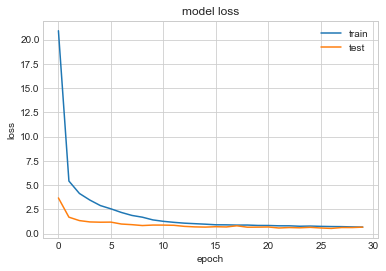

In [92]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show();

## <a class="anchor" id="3.3-bullet">3.3 Random Forrest</a>


In [86]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_sc, y_train)
rf.score(X_test_sc, y_test)

0.9063494402714759

In [132]:
paramz = {
    'max_features': [.4, .5, .7],
    'n_estimators': [90, 100, 150]
    
}
gs = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=paramz)
gs.fit(X_train_sc, y_train)
gs.score(X_test_sc, y_test)

0.9219445503205902

In [133]:
gs.best_params_

{'max_features': 0.5, 'n_estimators': 100}

## <a class="anchor" id="3.4-bullet">3.4 Bagger</a>


In [87]:
from sklearn.ensemble import BaggingRegressor

In [88]:
br = BaggingRegressor(RandomForestRegressor())

In [89]:
br.fit(X_train_sc, y_train)
br.score(X_test_sc, y_test)

0.9142826376263493

## <a class="anchor" id="3.6-bullet">3.7 Comparison</a>


In [135]:
df_big = df_main[df_main.viewCount > 800000000]
df_big_ss = ss.transform(df_big.loc[:, cols_include_initial])
df_big['GradientBoost'] = 10**gb.predict(df_big_ss)
df_big['NeuralNet'] = 10**nn.predict(df_big_ss)
df_big['RandomForest'] = 10**rf.predict(df_big_ss)
df_big['Bagger'] = 10**br.predict(df_big_ss)
df_big['GSForest'] = 10**gs.predict(df_big_ss)
#df_big.viewCount = df_big.viewCount.map(lambda x: '{:.6g}'.format(x))
df_big.loc[:, ['title', 'viewCount', 'RandomForest', 'GSForest','GradientBoost', 'NeuralNet', 'Bagger',]].sort_values(by='viewCount', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,title,viewCount,RandomForest,GSForest,GradientBoost,NeuralNet,Bagger
7479,Luis Fonsi - Despacito ft. Daddy Yankee,5555912002,4.820574e+09,1.984357e+09,7.136080e+08,59515628.0,9.541236e+08
4268,Ed Sheeran - Shape of You [Official Video],3827104659,2.395282e+09,1.955760e+09,6.634234e+08,24949882.0,6.845203e+08
7190,Wiz Khalifa - See You Again ft. Charlie Puth [...,3788737518,1.485443e+09,1.730075e+09,7.003975e+08,109122968.0,1.430299e+09
5540,Mark Ronson - Uptown Funk ft. Bruno Mars,3256917992,1.992513e+09,1.799341e+09,8.894255e+08,18852572.0,1.436450e+09
3634,PSY - GANGNAM STYLE(강남스타일) M/V,3218413082,1.994684e+09,1.608164e+09,7.752780e+08,54361564.0,1.495922e+09
569,Justin Bieber - Sorry (PURPOSE : The Movement),3014897224,8.853127e+08,7.562548e+08,8.275975e+08,23558290.0,6.589571e+08
7417,Maroon 5 - Sugar,2756205542,4.231355e+08,2.741807e+08,3.304045e+08,19781226.0,4.143682e+08
7514,Taylor Swift - Shake It Off,2650920924,1.314071e+09,1.773477e+09,6.357257e+08,34396276.0,1.483781e+09
5506,Katy Perry - Roar (Official),2638406673,2.054632e+09,1.681180e+09,1.046308e+09,61742212.0,1.355184e+09
627,Enrique Iglesias - Bailando (Español) ft. Desc...,2582945265,4.048148e+08,4.225627e+08,4.178253e+08,21149760.0,3.528018e+08


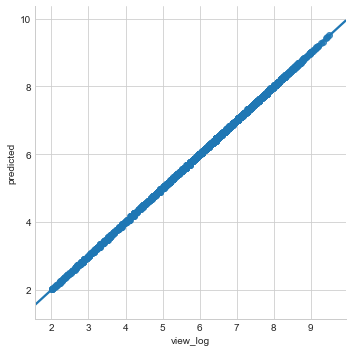

In [45]:
df_residuals = pd.DataFrame(y_test)
df_residuals['predicted'] = gb.predict(X_test_sc)
df_residuals['residuals'] = df_residuals.predicted - df_residuals.view_log 
sns.lmplot('view_log', 'predicted', data=df_residuals)

In [46]:
outliers = list(df_residuals.sort_values(by='residuals').iloc[:7, :].index)
temp = df_main
outliers_df = df_residuals.sort_values(by='residuals').iloc[:7, :].loc[:, ['predicted', 'residuals']]
temp.join(outliers_df, how='right').loc[:, ['title', 'view_log', 'predicted']]

,title,view_log,predicted
8446,No Church In The Wild,7.822761,7.776659
7048,[Lyrics] If U Go - Boyzed x Dubbie | Vigga Off...,3.311118,3.265525
6141,R Kelly Brother Gives Most Detailed Interview ...,4.114110,4.074071
2909,Only H x Acey Muni - Dear Adz (Prod. by Maniac...,4.217721,4.178841
2076,Godspeed You! Black Emperor - F#A#∞ (1998),5.640556,5.603455
3005,h ø r d - B3 - RFLX - LP (Giallo Disco records),3.517855,3.481855
7833,@OGEVERLAST practices w/ @badgerband,4.216641,4.180697


# <a class="anchor" id="4.0-bullet">4.0 Back Testing</a>

## 4.1 Model Comparison

In [160]:
df_small = df_main[pd.to_datetime(df_main.publishedAt)>datetime.datetime(2018, 9, 1)]
df_small_ss = ss.transform(df_small.loc[:, cols_include_initial])
df_small['GradientBoost'] = 10**gb.predict(df_small_ss)
df_small['NeuralNet'] = 10**nn.predict(df_small_ss)
df_small['RandomForest'] = 10**rf.predict(df_small_ss)
df_small['Bagger'] = 10**br.predict(df_small_ss)
df_small['GSForest'] = 10**gs.predict(df_small_ss)
df_small = df_small.loc[:, ['vidId', 'title', 'viewCount', 'RandomForest', 'GSForest','GradientBoost', 'NeuralNet', 'Bagger',]].sort_values(by='RandomForest', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in power
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipy

In [163]:
df_small.min()

vidId                                                  --BHuKeveg4
title            "Kalatapaswi" K.Viswanath ♬♬ Classical Hit Son...
viewCount                                                        0
RandomForest                                               168.098
GSForest                                                   210.923
GradientBoost                                              71.4145
NeuralNet                                                  1256.25
Bagger                                                     239.897
dtype: object

In [164]:
df_small.sort_values(by='RandomForest')

,vidId,title,viewCount,RandomForest,GSForest,GradientBoost,NeuralNet,Bagger
3880,6FQdE__eSz0,Обзор Укулеле баритон Flight NUB 310 l SKIFMUS...,131,1.680975e+02,2.109225e+02,2.724700e+02,2.194402e+03,2.955647e+02
2862,t7VQ38-FO30,Aiden H - Café con sal ft. Jackpot77,110,1.703862e+02,5.311342e+02,3.102748e+03,4.348906e+03,1.018833e+03
6306,0kVe9KlKzMA,R Mvmnt (Remix),16,1.747691e+02,1.021711e+03,7.141446e+01,2.575702e+03,7.307040e+02
1953,tI50c9qbQE4,MUSIK F'DJ RINDY RBS TERBARU | Lagu DJ Terbaru...,200,1.998832e+02,2.647951e+02,2.137855e+02,1.834739e+03,2.845841e+02
6352,B8sBDtbEsAw,અર્જુન આર મેડા નું રિમિક્સ બેવફા ગીત/ARJUN R M...,137,2.150432e+02,2.309993e+02,4.024354e+02,3.443476e+03,3.359024e+02
751,D8zJeVjsPtA,Jonathan C. Meier - Savage (Audio),112,2.164792e+02,2.241920e+02,1.935857e+02,1.822619e+03,2.398974e+02
6482,nchPngYVDQA,M.A.S.O - FARE SOLDI (Feat. R.ZETA),195,2.193200e+02,3.160910e+02,6.376327e+02,3.058335e+03,3.810833e+02
1883,k-qTdDVn3Wc,"Vetro F - ""Pseudo"" [Prod. Mr Smallcap]",230,2.221214e+02,3.646647e+02,7.070710e+02,2.365729e+03,5.475099e+02
1871,Qz-hHU1zacw,1. OTR x F.DECIDE - INTRO (Prod. 27Corazones),93,2.236450e+02,4.770289e+02,3.540174e+02,2.004044e+03,4.376089e+02
6279,jXT1323vYl4,Down Low (Nobody Has to Know) - R. Kelly,9,2.301088e+02,7.172017e+02,1.519095e+02,1.688808e+03,5.686268e+02


## New Pulls

In [42]:
df_new = pd.read_csv('./data/engineered_data/data_engineered_round2_10.14_1545.csv')

In [43]:
df_new_data = df_new[df_new['view_class']>1]

target_new = df_new_data.view_log

df_new_data_sc = df_new_data.loc[:, cols_include_initial]

df_new_data_sc = ss.transform(df_new_data_sc)

preds_new = gb.predict(df_new_data_sc)

In [44]:
gb.score(df_new_data_sc, target_new)

0.43372954536063085

In [45]:
df_new_predicted = df_new_data

df_new_predicted['predicted'] = preds_new

df_new_predicted = df_new_predicted[pd.to_datetime(df_new_predicted.publishedAt)>datetime.datetime(2018, 10, 2)]

df_new_predicted.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(427, 71)

In [48]:
df_new_predicted.loc[:, ['vidId','title', 'view_log', 'predicted']].sort_values(by='predicted', ascending=False)

,vidId,title,view_log,predicted
1965,a3OIkfphUas,F.Lackó-Konditerem (Official Music Video),3.720738,6.533221
8186,SGrqQ4kjoRc,"Sky, Sebastián Yatra, Zion & Lennox - Aquí Estaré",6.825535,6.426265
7395,8CdcCD5V-d8,Eminem - Venom,7.643133,6.379462
6205,6Dh-RL__uN4,TSERIES DISS TRACK,6.907602,6.295509
6754,kNrj87Q-4Yk,Barbra Streisand - Don't Lie to Me (Official V...,5.100674,6.295359
6449,erNfNSCKTjg,Rauw Alejandro x Saox x Lyanno x Sousa x Alvar...,5.364361,6.147870
8372,jda4bMcRseA,Pokahontaz - Z innej bajki (official video) pr...,5.099688,6.026177
1244,kTKxlA1LybE,Tenacious D - MAKING LOVE (Official Audio),4.612794,5.956951
6439,CIK5ZxzDLkA,Jaleo - Nicky Jam X Steve Aoki,6.893836,5.916495
7260,cDWt0TlCUT0,DOGODINE U PRIZRENU - BEOGRADSKI SINDIKAT&TRAG,5.166998,5.851547


In [51]:
df_new_predicted[abs(df_new_predicted.predicted - df_new_predicted.view_log)>2].loc[:, ['vidId','title', 'view_log', 'predicted']].sort_values(by='predicted', ascending=False)

,vidId,title,view_log,predicted
1965,a3OIkfphUas,F.Lackó-Konditerem (Official Music Video),3.720738,6.533221
3948,sw646YfBTc4,Mc do L - Catuaba de Açaí [Web-Clipe Oficial] ...,3.594724,5.680904
2375,YTgf13foo_E,Doppel G & Σάρο - Συννεφιά ☁,2.549003,5.554785
6230,IlogITwDl4w,Rဇာနည္ - အသင့္သူ A Thint' Thu,2.113943,5.549721
2069,CjD7zHbF7U4,Awaken-F（秦奮、韓沐伯、靖佩瑤、秦子墨、左葉）【吸引定律 The Law of At...,3.325721,5.532788
2121,PYmd1blKNsc,[MASHUP] Girls' Generation-Oh!GG & BoA - Lil' ...,2.340444,5.389820
764,f0BapC-y1ls,[MV] Wel.C (웰씨) - Burning (불타고 싶어),2.767898,5.322394
795,aB0LfiJDbAM,Deau - Traça a Linha (c/Letra),2.365488,5.316084
2804,K4bAQtQvl5c,ENTE ROGA KIDAKKAYATHIL | Rajesh H | Fr Shaji ...,2.313867,5.269329
751,6u3Gk6MNHd8,Mini God x Flávio Mc x Rafa G - SUSTI (c/Letra),2.390935,5.227591
